In [82]:
from keras.layers import Activation, Reshape, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def get_frontend(input_width,input_height) :
    
    model = Sequential()
    
    model.add(Conv2D(64,(3,3),activation='relu',padding = 'same',name = 'conv1_1',input_shape =(input_width, input_height, 3)))
    model.add(Conv2D(64,(3,3),activation='relu',padding = 'same',name = 'conv1_2'))
    model.add(MaxPooling2D(pool_size=(2,2),name = 'pool_1'))

    
    model.add(Conv2D(128,(3,3),activation='relu',padding = 'same',name = 'conv2_1'))
    model.add(Conv2D(128,(3,3),activation='relu',padding = 'same',name = 'conv2_2'))
    model.add(MaxPooling2D(pool_size=(2,2),name = 'pool_2'))
    
    model.add(Conv2D(256,(3,3),activation='relu',padding = 'same',name = 'conv3_1'))
    model.add(Conv2D(256,(3,3),activation='relu',padding = 'same',name = 'conv3_2'))
    model.add(Conv2D(256,(3,3),activation='relu',padding = 'same',name = 'conv3_3'))
    model.add(MaxPooling2D(pool_size=(2,2),name = 'pool_3'))
    
    model.add(Conv2D(512,(3,3),activation='relu',padding = 'same',name = 'conv4_1'))
    model.add(Conv2D(512,(3,3),activation='relu',padding = 'same',name = 'conv4_2'))
    model.add(Conv2D(512,(3,3),activation='relu',padding = 'same',name = 'conv4_3'))
    
    model.add(Conv2D(512,(3,3),activation='relu',dilation_rate= (2,2), padding = 'same',name = 'conv5_1'))
    model.add(Conv2D(512,(3,3),activation='relu',dilation_rate= (2,2), padding = 'same',name = 'conv5_2'))
    model.add(Conv2D(512,(3,3),activation='relu',dilation_rate= (2,2), padding = 'same',name = 'conv5_3'))
    
    
    model.add(Conv2D(4096,(7,7),dilation_rate= (4,4), padding = "same", activation='relu', name = "fc6"))
    model.add(Dropout(0.5))
    model.add(Conv2D(4096,(1,1),activation='relu',padding = "same",name = "fc7"))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(21,(1,1),activation='linear',name = 'fc-final'))
    
    return model
    
    

In [22]:
model = get_frontend(512,512)

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 512, 512, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 512, 512, 64)      36928     
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 256, 256, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 256, 256, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 256, 256, 128)     147584    
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 128, 128, 128)     0         
_________________________________________________________________
conv3_1 (Conv2D)             (None, 128, 128, 256)     295168    
__________

In [36]:
def add_softmax(model) :
    
    _, curr_width, curr_height, curr_channels = model.layers[-1].output_shape
    
    
    model.add(Activation('softmax'))
    return model

In [37]:
model = get_frontend(512,512)
model = add_softmax(model)

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 512, 512, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 512, 512, 64)      36928     
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 256, 256, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 256, 256, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 256, 256, 128)     147584    
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 128, 128, 128)     0         
_________________________________________________________________
conv3_1 (Conv2D)             (None, 128, 128, 256)     295168    
__________

In [39]:
def add_context(model,no_of_classes) :
    
    model.add(Conv2D(no_of_classes*2,(3,3),padding = "same",activation = 'relu', name = "ct_conv1_1"))
    model.add(Conv2D(no_of_classes*2,(3,3),padding = "same",activation = 'relu', name = "ct_conv1_2"))

    model.add(Conv2D(no_of_classes*4,(3,3),padding = "same",dilation_rate = (2,2),activation = 'relu', name = "ct_conv2_1"))
    model.add(Conv2D(no_of_classes*8,(3,3),padding = "same",dilation_rate = (4,4),activation = 'relu', name = "ct_conv3_1"))
    model.add(Conv2D(no_of_classes*16,(3,3),padding = 'same', dilation_rate = (8,8),activation = 'relu', name = "ct_conv4_1"))
    model.add(Conv2D(no_of_classes*32,(3,3), padding = 'same',dilation_rate = (16,16),activation = 'relu', name = "ct_conv5_1"))
    
    model.add(Conv2D(no_of_classes*32,(3,3),padding = 'same', activation = 'relu', name = "ct_fc1"))
    model.add(Conv2D(no_of_classes,(1,1),activation = 'relu', name = "ct_final"))
    
    return model

In [40]:
model = get_frontend(512,512)
model = add_context(model,21)
model = add_softmax(model)

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 512, 512, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 512, 512, 64)      36928     
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 256, 256, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 256, 256, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 256, 256, 128)     147584    
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 128, 128, 128)     0         
_________________________________________________________________
conv3_1 (Conv2D)             (None, 128, 128, 256)     295168    
__________

In [43]:
weights_data = np.load("/media/guru/98306C94306C7AE0/Projects/conversion/converted/dilation8_pascal_voc.npy", encoding='latin1').item()

In [44]:
for layer in model.layers:
    if layer.name in weights_data.keys():
        layer_weights = weights_data[layer.name]
        layer.set_weights((layer_weights['weights'],layer_weights['biases']))
    else :
        print(layer.name)

pool_1
pool_2
pool_3
dropout_27
dropout_28
activation_7


In [45]:
from PIL import Image

In [84]:
image_rgb = np.array(Image.open("/home/guru/Desktop/Webp.net-resizeimage.jpg")).astype(np.float32)

In [85]:
image_rgb.shape

(512, 512, 3)

In [86]:
mean = [102.93, 111.36, 116.52]

In [87]:
image = image_rgb[:, :, ::-1] - mean

In [88]:
image.shape

(512, 512, 3)

In [89]:
 image_size = image.shape

In [90]:
input_width, input_height = 512, 512
label_margin = 186
net_in = np.zeros((1, input_height, input_width, 3), dtype=np.float32)

In [54]:
output_height = input_height - 2 * label_margin
output_width = input_width - 2 * label_margin

In [91]:
mage = np.pad(image,
                   ((label_margin, label_margin),
                    (label_margin, label_margin),
                    (0, 0)), 'reflect')

In [92]:
margins_h = (0, input_height - image.shape[0])
margins_w = (0, input_width - image.shape[1])
image = np.pad(image,(margins_h,margins_w,(0, 0)), 'reflect')

In [93]:
net_in[0] = image
prob = model.predict(net_in)[0]

In [94]:
prob.shape

(64, 64, 21)

In [78]:
def interp_map(prob, zoom, width, height):
    zoom_prob = np.zeros((height, width, prob.shape[2]), dtype=np.float32)
    for c in range(prob.shape[2]):
        for h in range(height):
            for w in range(width):
                r0 = h // zoom
                r1 = r0 + 1
                c0 = w // zoom
                c1 = c0 + 1
                rt = float(h) / zoom - r0
                ct = float(w) / zoom - c0
                v0 = rt * prob[r1, c0, c] + (1 - rt) * prob[r0, c0, c]
                v1 = rt * prob[r1, c1, c] + (1 - rt) * prob[r0, c1, c]
                zoom_prob[h, w, c] = (1 - ct) * v0 + ct * v1
    return zoom_prob

In [95]:
prediction = np.argmax(prob, axis=2)


In [96]:
prediction.shape

(64, 64)

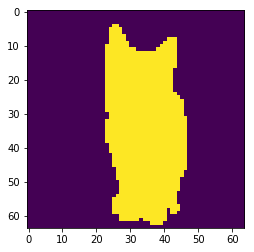

In [97]:
plt.imshow(prediction)